In [1]:
# Python Notebook for PHYS 321B Computational Assignment 5 Question 3!:

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from matplotlib import rc
import scipy as sp

# extra stuff to make the plots look nice:

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

params = {"text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["cmr10"],
          "font.size": 20
         }
plt.rcParams.update(params)
plt.rcParams['axes.formatter.use_mathtext'] = True

import os
os.environ["PATH"]
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin/'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# Set tick parameters using rcParams
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.major.width'] = 0.7
plt.rcParams['xtick.minor.width'] = 0.7
plt.rcParams['ytick.major.width'] = 0.7
plt.rcParams['ytick.minor.width'] = 0.7

plt.rcParams['font.weight'] = 'bold'



1. Consider a rigid object rotating without torque. At $t = 0$ there are
    masses m at $x = \pm L$, $y = \pm 2L$, and $z = \pm 3L$. It is rotating at $10s^{-1}$
    along an axis making an angle of $\frac{\pi}{12}$ with $\hat{z}$ in the x-z plane. Make plots
    of the components of $\vec{\omega}$ , $I$, and $\vec{L}$ as a function of time.
2. Repeat for the object rotating at 10s−1 along an axis making an angle $\frac{\pi}{12}$ with $\hat{x}$ in the x-y plane
  
3. Repeat for the object rotating at 10s−1 along an axis making an angle $\frac{\pi}{12}$ with $\hat{z}$ in the y-z plane
    
    
Comment on any differences you see between the third case and the first
two.
In general you should submit your code, the plot it produces, and a brief
explanation of what you did.

The solution to this problem will be as follows:

1. Calculate the moment of inertia tensor for $t=0$ of the system, calling this the initial condition.

2. Using the time derivative of the moment of inertia tensor calculated during the written portion of this assignment, time evolve the system in small timesteps. To do this, we will need the changing components of $\omega$.

3. Find the changing components of $\omega$ by imposing a system of linear equations such that the components of the angular momentum are constant. We may assume that these components are independently constant with respect to time as there are not external torques acting on the system. 

4. Perform the above steps for sufficiently many time steps to see the behaviour of $I$, $\omega$ and $\vec{L}$ which will be constant with respect to t. 

The first step is to calculate the moment of inertia tensor for $t=0$ for all components:

$$
\mathbf{I} = \begin{pmatrix}
I_{xx} & I_{xy} & I_{xz} \\
I_{yx} & I_{yy} & I_{yz} \\
I_{zx} & I_{zy} & I_{zz}
\end{pmatrix}
$$

Where:

$$
I_{ij} = \int dm (\delta_{ij} |\vec{r}|^2 -r_ir_j)
$$

Since we only have point masses, this becomes:

$$
I_{ij} = \sum_{k=1}^{n} m_k \left( \delta_{ij} |\mathbf{r}|^2 - r_{ki} r_{kj} \right)
$$

We may notice that all of the masses begin nicely along each axis, and so the moment of inertia tensor will be diagonal. We may then find all of three of the non-zero components explicitly:

$$
I_{11} = \sum_{k=1}^{n} m_k \left( y_k^2 +z_k^2 \right)
$$

$$
I_{11} = m \left( (2L)^2 + (2L)^2 +(3L)^2 + (3L)^2 \right)
$$

$$
I_{11} = 26 m L^2
$$

Now for $I_{22}$:

$$
I_{22} = \sum_{k=1}^{n} m_k \left( x_k^2 +z_k^2 \right)
$$

$$
I_{22} = m \left( (L)^2 + (L)^2 +(3L)^2 + (3L)^2 \right)
$$

$$
I_{22} = 20 m L^2
$$

Finally for $I_{33}$:

$$
I_{33} = \sum_{k=1}^{n} m_k \left( x_k^2 +y_k^2 \right)
$$

$$
I_{33} = m \left( (L)^2 + (L)^2 +(2L)^2 + (2L)^2 \right)
$$

$$
I_{33} =  10 m L^2
$$

So our moment of inertia tensor at $t=0$ is:

$$
\mathbf{I} = mL^2 \begin{pmatrix}
26 & 0 & 0 \\
0 & 20 & 0 \\
0 & 0 & 10
\end{pmatrix}
$$

Now we can deal with the initial angular velocity of the system. At $t=0$, we have that:

$$
\mathbf{\omega} = \begin{pmatrix}
\omega_{x} \\
\omega_{y} \\
\omega_{z}
\end{pmatrix} = \begin{pmatrix}
\dot{\theta}_{x} \\
\dot{\theta}_{y} \\
\dot{\theta}_{z}
\end{pmatrix} 
$$

We know that the initial angular velocity makes an angle of $\phi = \pi / 12$ with $\hat{y}$ in the yz plane for the first part of this problem. This means that:

$$
{\omega (t=0)} = \begin{pmatrix}
0 \\
\omega_{0} cos\left(\frac{\pi}{12}\right) \\
\omega_{0}sin\left(\frac{\pi}{12}\right)
\end{pmatrix} 
$$

With $\omega_0 = 10s^{-1}$. 

The moment of inertia evolves as we had in assignment 5 such that:

$$
\frac{d I}{dt} = \begin{pmatrix}
{-2\dot{\theta_3} I^{12} + 2\dot{\theta_2} I^{13}} & 
{\dot{\theta_3}(I^{11} -I^{22}) + \dot{\theta_2} I^{23} -\dot{\theta_1}I^{13}}
& {\dot{\theta_2}(I^{33} -I^{11}) + \dot{\theta_1} I^{12} -\dot{\theta_3}I^{23}}\\
{\dot{\theta_3}(I^{11} -I^{22}) + \dot{\theta_2} I^{23} -\dot{\theta_1}I^{13}}
& {-2\dot{\theta_1} I^{23} + 2\dot{\theta_3} I^{12}}
& {\dot{\theta_1}(I^{22} -I^{33}) - \dot{\theta_3} I^{13} -\dot{\theta_2}I^{12}}\\
{\dot{\theta_2}(I^{33} -I^{11}) + \dot{\theta_1} I^{12} -\dot{\theta_3}I^{23}}& 
{{\dot{\theta_1}(I^{22} -I^{33}) - \dot{\theta_3} I^{13} -\dot{\theta_2}I^{12}}}& 
{-2\dot{\theta_2} I^{13} + 2\dot{\theta_1} I^{23}}
\end{pmatrix}
$$


We can convert this into a time evolution of the system if we turn the derivatives into steps and we take the previous moment of inertia tensor elements and angular velocity and plug into the above such that:

$$
I_{n+1} = I_n + \frac{dI_n}{dt} \cdot \Delta t
$$

But we do not know $\dot{\theta}_i$s a priori. Will need to calculate them. We know that:

$$
\vec{L} = I \cdot \vec{\omega}
$$

Written in less compact form:

$$
\begin{pmatrix}
L_{x} \\
L_{y} \\
L_{z}
\end{pmatrix} = I \cdot \begin{pmatrix}
\dot{\theta}_{x} \\
\dot{\theta}_{y} \\
\dot{\theta}_{z}
\end{pmatrix} 
$$

Which will give us three linear equations that need to be solved since we have already assumed that $L_i$ are all constants. To solve this, however, we will need to invert the matrix, I, so that we may find the angular velocity values. 

In [23]:
# we can now begin to program in the above analysis. We start by assigning the initial conditions:

# constants: set to one for simplicity

m = 1  # kg
L = 1  # m
w = 10 #s^-1

# inertia tensor:
I_0 = m*(L**2) * np.array([[26, 0, 0], [0, 20, 0], [0, 0, 10]])

# angular velocity:
w_03 = w*np.array([0, np.cos(np.pi/12),np.sin(np.pi/12)])

w_02 = w*np.array([np.cos(np.pi/12), np.sin(np.pi/12),0])

w_01 = w*np.array([np.sin(np.pi/12), 0, np.cos(np.pi/12)])


# the initial angular momentum is then:
L_0 = np.dot(I_0, w_0)
L_02 = np.dot(I_0, w_02)
L_01 = np.dot(I_0, w_01)


# components:
L_x0 = L_0[0]; L_y0 = L_0[1]; L_z0 = L_0[2];

In [4]:
# we now need a system solver to get our angular velocity at each timestep:

def velocity_solver(I, L_0=L_0):
    '''
    Takes the current moment
    of inertia tensor and the 
    initial angular momentum
    and inverts the inertia tensor. 
    Multiplies this by the initial 
    angular momentum and returns the 
    angular velocity at the current 
    time step
    '''
    
    # inverts I:
    I_inv = np.linalg.inv(I_0)
    
    # finds current velocity:
    w_curr = np.dot(I_inv, L_0)
    
    return w_curr

In [5]:
# The next step is to code in the time evolution:

def time_evolve(I, delta_t, L_0=L_0):
    '''
    Takes the current MOI 
    tensor, finds the current 
    angular velocity, and then evolves 
    system according to the above 
    MOI time derivative tensor
    '''
    
    # finds current angular velocity:
    w_curr = velocity_solver(I, L_0)
    
    # components:
    w1 = w_curr[0]; w2 = w_curr[1]; w3 = w_curr[2];
    
    # components of the inertia tensor:
    
    I11 = I[0,0]; I22 = I[1,1]; I33 = I[2,2]
    I12 = I[0,1]; I13 = I[0,2]; I21 = I[1,0]
    I23 = I[1,2]; I31 = I[2,0]; I32 = I[2,1]
  
    # derivative elements:
    
    dI_11 = -2*w3*I12 +2*w2*I13
    dI_22 = -2*w1*I23 +2*w3*I12
    dI_33 = -2*w2*I13 +2*w1*I23
    dI_12 = w3*(I11-I22) +w2 * I23 -w1*I13
    dI_21 = w3*(I11-I22) +w2 * I23 -w1*I13
    dI_13 = w2*(I33-I11) +w1 * I12 -w3*I23
    dI_31 = w2*(I33-I11) +w1 * I12 -w3*I23
    dI_23 = w1*(I22-I33) +w3 * I13 -w2*I12
    dI_32 = w1*(I22-I33) +w3 * I13 -w2*I12
    
    # new components of the MOI tensor:
    
    I11_new = I11 + dI_11 * delta_t
    I22_new = I22 + dI_22 * delta_t
    I33_new = I33 + dI_33 * delta_t
    I12_new = I12 + dI_12 * delta_t
    I21_new = I21 + dI_21 * delta_t
    I13_new = I13 + dI_13 * delta_t
    I31_new = I31 + dI_31 * delta_t
    I23_new = I23 + dI_23 * delta_t
    I32_new = I32 + dI_32 * delta_t
    
    # new tensor:
    
    I_new = np.array([[I11_new,I12_new,I13_new],[I21_new,I22_new,I23_new],[I31_new,I32_new,I33_new]])

    return I_new, w_curr

In [24]:
# now we can run our procedure for a whole bunch of time steps:

# start and end of evolution:

# Lets choose final time so we get about 5 periods

ti = 0; tf = 3
del_t = 0.0001
num_t = int(((tf-ti)/del_t))

ts = np.linspace(ti, tf, num_t)

# initializes quantities of interest:

I_list = np.array([np.zeros((3,3)) for i in range(len(ts))])
w_list = np.array([np.zeros((3)) for i in range(len(ts))])

I_curr = I_0
w_curr = w_03

for i in range(len(ts)):
    I_new = time_evolve(I_curr, del_t, L_0=L_0)[0]
    w_new = time_evolve(I_curr, del_t, L_0=L_0)[1]
    
    I_list[i] = I_new
    w_list[i] = w_new
    
    I_curr = I_new
    w_curr = w_new
    
# plottable values:

I_plot = I_list.T
w_plot = w_list.T

# and for the other directions of rotation:

I_list2 = np.array([np.zeros((3,3)) for i in range(len(ts))])
w_list2 = np.array([np.zeros((3)) for i in range(len(ts))])

I_curr2 = I_0
w_curr2 = w_02

for i in range(len(ts)):
    I_new2 = time_evolve(I_curr2, del_t,L_0=L_02)[0]
    w_new2 = time_evolve(I_curr2, del_t,L_0=L_02)[1]
    
    I_list2[i] = I_new2
    w_list2[i] = w_new2
    
    I_curr2 = I_new2
    w_curr2 = w_new2
    
# plottable values:

I_plot2 = I_list2.T
w_plot2 = w_list2.T

# and for the first:

I_list1 = np.array([np.zeros((3,3)) for i in range(len(ts))])
w_list1 = np.array([np.zeros((3)) for i in range(len(ts))])

I_curr1 = I_0
w_curr1 = w_01

for i in range(len(ts)):
    I_new1 = time_evolve(I_curr1, del_t, L_0=L_01)[0]
    w_new1 = time_evolve(I_curr1, del_t, L_0=L_01)[1]
    
    I_list1[i] = I_new1
    w_list1[i] = w_new1
    
    I_curr1 = I_new1
    w_curr1 = w_new1
    
# plottable values:

I_plot1 = I_list1.T
w_plot1 = w_list1.T


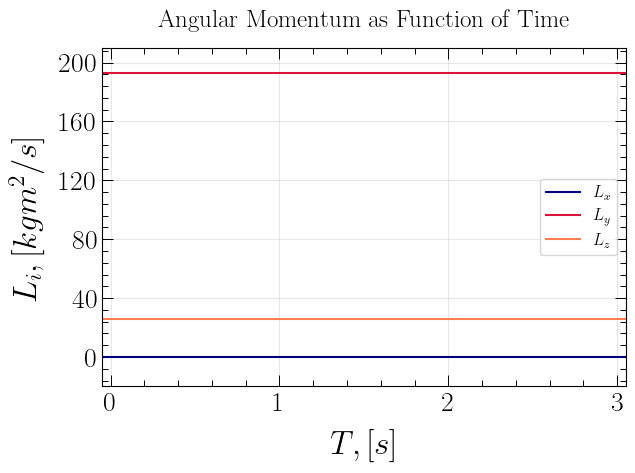

In [25]:
# we can now plot each of the interesting quantities starting with the angular momentum
# which of course we assumed to be constant:

# initiates plotting parameters
width=8;height=6;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Angular Momentum as Function of Time", pad = 15, fontsize=18)
ax1.set_xlabel(r"$T, [s]$",labelpad =10, fontsize=24)
ax1.set_ylabel(r"$L_i, [kgm^2/s]$",labelpad =10,fontsize=24)

# actual plots:
ax1.axhline(y=L_x0, c='navy', label=r"$L_x$")
ax1.axhline(y=L_y0, c='crimson', label=r"$L_y$")
ax1.axhline(y=L_z0, c='coral', label=r"$L_z$")


# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(40));ax1.yaxis.set_minor_locator(MultipleLocator(8))
ax1.xaxis.set_major_locator(MultipleLocator(1));ax1.xaxis.set_minor_locator(MultipleLocator(0.2))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.set_xlim(-0.05, 3.05)
ax1.set_ylim(-20, 210)

ax1.legend(fontsize=12)
plt.show()

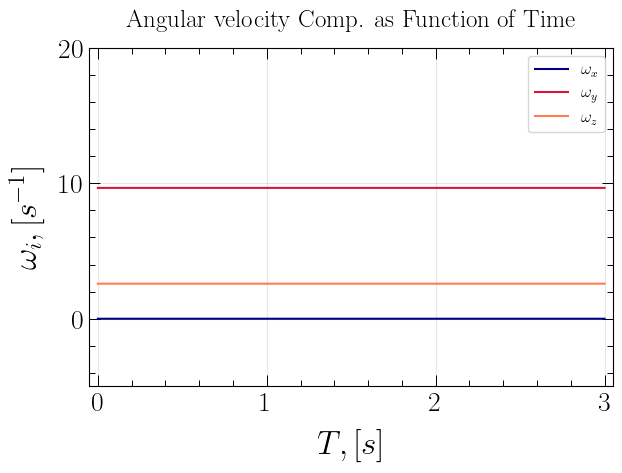

In [26]:
# next is the angular velocity which we did not assume to be constant:

# initiates plotting parameters
width=8;height=6;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Angular velocity Comp. as Function of Time", pad = 15, fontsize=18)
ax1.set_xlabel(r"$T, [s]$",labelpad =10, fontsize=24)
ax1.set_ylabel(r"$\omega_i, [s^{-1}]$",labelpad =10,fontsize=24)

# actual plots:
ax1.plot(ts, w_plot[0], c='navy', label=r"$\omega_x$")
ax1.plot(ts, w_plot[1], c='crimson', label=r"$\omega_y$")
ax1.plot(ts, w_plot[2], c='coral', label=r"$\omega_z$")


# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(10));ax1.yaxis.set_minor_locator(MultipleLocator(2))
ax1.xaxis.set_major_locator(MultipleLocator(1));ax1.xaxis.set_minor_locator(MultipleLocator(0.2))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.set_xlim(-0.05, 3.05)
ax1.set_ylim(-5, 20)

ax1.legend(fontsize=12)
plt.show()

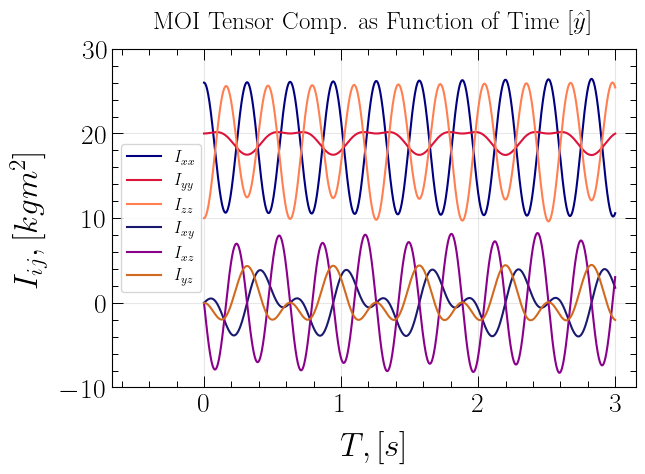

In [27]:
# finally we arrive at the interesting one, the components
# of the moment of inertia tensor. Since the tensor is symmetric
# we only need to plot 6 components:

# initiates plotting parameters
width=8;height=6;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"MOI Tensor Comp. as Function of Time [$\hat{y}]$", pad = 15, fontsize=18)
ax1.set_xlabel(r"$T, [s]$",labelpad =10, fontsize=24)
ax1.set_ylabel(r"$I_{ij}, [kg m^2]$",labelpad =10,fontsize=24)

# actual plots:
ax1.plot(ts, I_plot[0,0], c='navy', label=r"$I_{xx}$")
ax1.plot(ts, I_plot[1,1], c='crimson', label=r"$I_{yy}$")
ax1.plot(ts, I_plot[2,2], c='coral', label=r"$I_{zz}$")

ax1.plot(ts, I_plot[0,1], c='midnightblue', label=r"$I_{xy}$")
ax1.plot(ts, I_plot[0,2], c='darkmagenta', label=r"$I_{xz}$")
ax1.plot(ts, I_plot[1,2], c='chocolate', label=r"$I_{yz}$")

# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(10));ax1.yaxis.set_minor_locator(MultipleLocator(2))
ax1.xaxis.set_major_locator(MultipleLocator(1));ax1.xaxis.set_minor_locator(MultipleLocator(0.2))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.set_xlim(-0.67, 3.15)
ax1.set_ylim(-10, 30)

ax1.legend(fontsize=12, loc='center left')
plt.show()

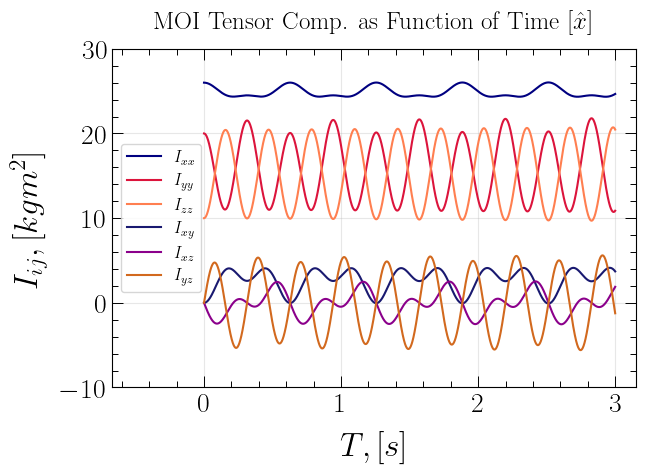

In [28]:
# initiates plotting parameters
width=8;height=6;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"MOI Tensor Comp. as Function of Time [$\hat{x}]$", pad = 15, fontsize=18)
ax1.set_xlabel(r"$T, [s]$",labelpad =10, fontsize=24)
ax1.set_ylabel(r"$I_{ij}, [kg m^2]$",labelpad =10,fontsize=24)

# actual plots:
ax1.plot(ts, I_plot2[0,0], c='navy', label=r"$I_{xx}$")
ax1.plot(ts, I_plot2[1,1], c='crimson', label=r"$I_{yy}$")
ax1.plot(ts, I_plot2[2,2], c='coral', label=r"$I_{zz}$")

ax1.plot(ts, I_plot2[0,1], c='midnightblue', label=r"$I_{xy}$")
ax1.plot(ts, I_plot2[0,2], c='darkmagenta', label=r"$I_{xz}$")
ax1.plot(ts, I_plot2[1,2], c='chocolate', label=r"$I_{yz}$")

# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(10));ax1.yaxis.set_minor_locator(MultipleLocator(2))
ax1.xaxis.set_major_locator(MultipleLocator(1));ax1.xaxis.set_minor_locator(MultipleLocator(0.2))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.set_xlim(-0.67, 3.15)
ax1.set_ylim(-10, 30)

ax1.legend(fontsize=12, loc='center left')
plt.show()

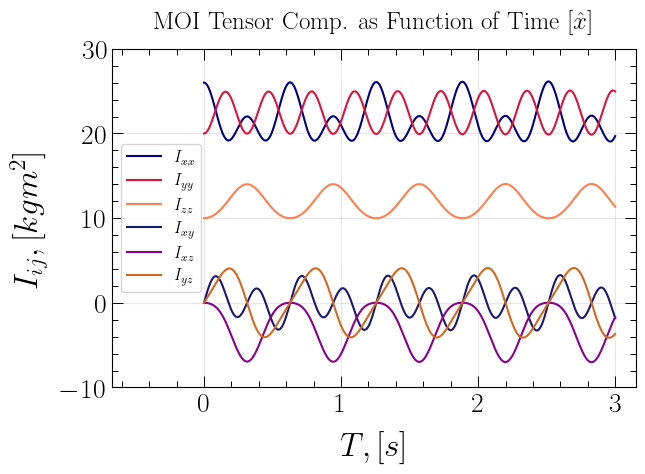

In [29]:
# initiates plotting parameters
width=8;height=6;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"MOI Tensor Comp. as Function of Time [$\hat{x}]$", pad = 15, fontsize=18)
ax1.set_xlabel(r"$T, [s]$",labelpad =10, fontsize=24)
ax1.set_ylabel(r"$I_{ij}, [kg m^2]$",labelpad =10,fontsize=24)

# actual plots:
ax1.plot(ts, I_plot1[0,0], c='navy', label=r"$I_{xx}$")
ax1.plot(ts, I_plot1[1,1], c='crimson', label=r"$I_{yy}$")
ax1.plot(ts, I_plot1[2,2], c='coral', label=r"$I_{zz}$")

ax1.plot(ts, I_plot1[0,1], c='midnightblue', label=r"$I_{xy}$")
ax1.plot(ts, I_plot1[0,2], c='darkmagenta', label=r"$I_{xz}$")
ax1.plot(ts, I_plot1[1,2], c='chocolate', label=r"$I_{yz}$")

# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(10));ax1.yaxis.set_minor_locator(MultipleLocator(2))
ax1.xaxis.set_major_locator(MultipleLocator(1));ax1.xaxis.set_minor_locator(MultipleLocator(0.2))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.set_xlim(-0.67, 3.15)
ax1.set_ylim(-10, 30)

ax1.legend(fontsize=12, loc='center left')
plt.show()

I don't see any considerable marked difference between the third with respect to the other two cases. It is likely that this problem is supposed to highlight something to do with the intermediate axis or some other principle that I cannot immediately discern from the above plots. It may be the case that the procedure was performed incorrectly but in favour of this method is that the solutions are all periodic, as expected, and bounded. Further, the angular velocity is constant even though we did not assume it was in the initial cartesian frame of the system. This also makes sense to make since the components of angular momentum are conserved. It may be the case that by assuming this, we have created a feedback that yields the other results stated.

That being said, if the results are what is expected, we can see that there are some difference in the inertia tensor between the cases. The most obvious difference is that the mean inertia element for the diagonal elements sits at roughly the same value for the y-axis rotation, while the other two axes have the primary axis of rotation differing significantly from the other two diagonal elements. The maxima of the y-axis rotation also appears to be out of phase with the maxima of the other two. 